# Hate Speech Detection with Machine Learning

* Hate speech is one of the serious issues we see on social media platforms like Twitter and Facebook daily. 
* Most of the posts containing hate speech can be found in the accounts of people with political views. 
* So, if you want to learn how to train a hate speech detection model with machine learning, this article is for you.

* There is no legal definition of hate speech because people’s opinions cannot easily be classified as hateful or offensive. 
* Nevertheless, the United Nations defines hate speech as any type of verbal, written or behavioural communication that can attack or use discriminatory language regarding a person or a group of people based on their identity based on religion, ethnicity, nationality, race, colour, ancestry, gender or any other identity factor.

* Hope you now have understood what hate speech is. 
* Social media platforms need to detect hate speech and prevent it from going viral or ban it at the right time. 
* So in the section below, I have build a Hate speech detection with machine learning using the Python programming language.

### Dataset

* The dataset here used for hate speech detection task is downloaded from Kaggle. 
* This Dataset can be download from the given link :- https://raw.githubusercontent.com/amankharwal/Website-data/master/twitter.csv
* This dataset was originally collected from Twitter and contains the following columns:

1. Index
2. Count
3. Hate_speech
4. Offensive_language
5. Neither 
6. Class
7. Tweet 

* Reference :- I have taken reference from this article https://thecleverprogrammer.com/2021/07/25/hate-speech-detection-with-machine-learning/
* I would like to thank for providing & sharing knowledge with us.

###############################################################################################################################

In [1]:
from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

* In the above line of code, I have imported all the required libraries.

In [2]:
data = pd.read_csv("twitter.csv")             # Import the dataset which is in csv file format
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


* Printing top 5 rows from the dataset

### Now let's add a new column to this dataset as labels which will contain the values as:

1. Hate Speech 
2. Offensive Language 
3. No Hate and Offensive

In [3]:
data["labels"] = data["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})

In [4]:
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  


* Now lets select only tweet and labels columns for the rest of the task of training a hate speech detection model.
* Because other columns are irrelevent , so no need to go further with them.

In [5]:
data = data[["tweet", "labels"]]

print(data.head())

                                               tweet                 labels
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language


* Now , lets clean our Data.
* Here we have used a Function to clean the texts in the tweet column.

* Also we will remove all the full stops, or exclamation marks from the text dataset because these all are not required for doing sentiment analysis.

In [6]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

data["tweet"] = data["tweet"].apply(clean)

In [7]:
data.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language


### EDA
* Let's do some EDA on Filtered Data

In [8]:
data.labels.value_counts()

Offensive Language       19190
No Hate and Offensive     4163
Hate Speech               1430
Name: labels, dtype: int64

* As we have 3 classes in our Dataset.
* So , here we are getting count of each class.

In [9]:
data['labels'].unique()

array(['No Hate and Offensive', 'Offensive Language', 'Hate Speech'],
      dtype=object)

<AxesSubplot:xlabel='labels', ylabel='count'>

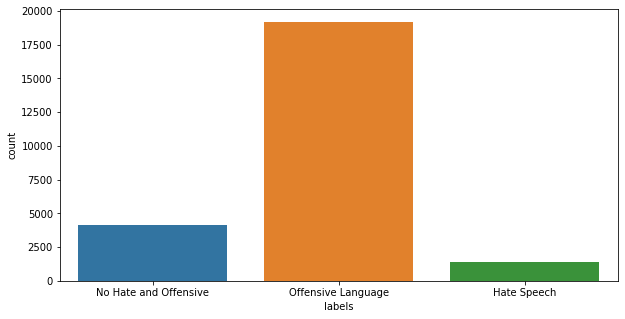

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.countplot(x=data.labels)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   labels  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


* Lets find amount of Percentage of each class in our Dataset.

In [12]:
Offensive_Language = (19190/24783)*100

print(Offensive_Language)

77.43211072105879


In [13]:
No_Hate_and_Offensive = (4163/24783)*100

print(No_Hate_and_Offensive)

16.797804946939436


In [14]:
Hate_Speech = (1430/24783)*100

print(Hate_Speech)

5.770084332001776


### Now let’s split the dataset into training and test sets and train a machine learning model for the task of hate speech detection:

In [15]:
x = np.array(data["tweet"])     # Independent Variable

y = np.array(data["labels"])    # Dependent Variable

In [16]:
cv = CountVectorizer()

X = cv.fit_transform(x) # Fit the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

DecisionTreeClassifier()

* Here I have used Decision Tree Classifier algorithm technique

In [17]:
# accuracy of our classification tree

clf.score(X_test,y_test)

0.8759016994742633

In [18]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9996
Test set score: 0.8759


In [19]:
sample = "Let's unite and kill all the people who are protesting against the government"

data = cv.transform([sample]).toarray()

print(clf.predict(data))

['Hate Speech']


* Here I used Random Forest Algorithm

In [20]:
classifier = RandomForestClassifier(random_state=6)

In [21]:
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [22]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.9996
Test set score: 0.8922


In [23]:
sample = "Let's unite and kill all the people who are protesting against the government"

data = cv.transform([sample]).toarray()

print(classifier.predict(data))

['Offensive Language']


### Now Lets Save Our Model for Deployment

In [26]:
import pickle as pk     # to save the model

In [27]:
filename = "hate_speech.pk"

pk.dump(clf,open(filename,"wb"))      # Here, I have used Decision Tree Classifier algorithm as a Final Model.